# Utopian Tech Solutions – Attrition Risk Analytics  
### Finals Project – Analytics Application  
### Prepared by: SafeCard  
John Andrew Emmanuel Avelino • Stephanie Kyla Belleza • Althea Jane Trinidad • Mary Shanley Sencil  
Instructor: Paolo G. Hilado, MSc (Data Science)  
Date of Submission: December 12, 2025  

---

## 📌 Project Overview  
Utopian Tech Solutions is experiencing rising attrition risk, threatening workflow stability, productivity, and organizational morale. This notebook follows the CRISP-DM methodology to:

1. Identify the strongest **drivers** of Attrition Risk.  
2. Build predictive models to estimate **which employees are most at risk**.  
3. Provide insights and recommendations for HR decision-making.

---

## 📌 Dataset Summary  
The dataset consists of **500 employees** with variables covering demographic, behavioral, workload, and psychometric factors.  
Target variable: **Attrition_Risk_Score (0–100)**.

This notebook includes:  
- EDA and visualization  
- Data preprocessing  
- Modelling (Linear Regression, Random Forest, XGBoost)  
- Model evaluation and comparison  
- Final recommendations

---



In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

## 📊 2. Data Understanding  
Below, we load the Attrition dataset and inspect its structure, dimensions, and information.

---


In [ ]:
# -------------------------------------------------------------
# Load dataset from Excel file and display the first few rows.
# -------------------------------------------------------------
df = pd.read_excel("AttritionRiskScore.xlsx")
df.head()


,Unnamed: 0,Age,Tenure_Years,Job_Satisfaction,Engagement_Score,Overtime_Hours,Salary,Training_Hours,Remote_Work_Frequency,Work_Life_Balance,Manager_Rating,Department,Attrition_Risk_Score
0,0,50,10.740512,1.471004,2.816681,9.965114,9496.891288,47.611089,2,1.605108,1.317121,HR,71.106308
1,1,36,1.679557,3.306066,7.060892,1.541166,4849.740518,2.121115,5,6.353626,3.263402,HR,44.206298
2,2,29,1.730147,2.096221,9.729208,1.171019,9644.537824,13.266307,1,7.649800,4.632074,Engineering,31.883809
3,3,42,14.806274,3.216712,1.845106,6.684766,9500.457749,30.077694,3,1.291991,2.585251,Engineering,68.949915
4,4,40,5.926927,3.605682,7.053419,15.697940,12142.821751,14.827996,4,6.928459,2.185303,Sales,39.333803


### 🧹 Data Cleaning  
The dataset contains an unnecessary index column (`Unnamed: 0`), which is removed below.


In [ ]:
# -------------------------------------------------------------
# Drop redundant index column if present.
# -------------------------------------------------------------
df = df.drop(columns=["Unnamed: 0"])
df.head()


,Age,Tenure_Years,Job_Satisfaction,Engagement_Score,Overtime_Hours,Salary,Training_Hours,Remote_Work_Frequency,Work_Life_Balance,Manager_Rating,Department,Attrition_Risk_Score
0,50,10.740512,1.471004,2.816681,9.965114,9496.891288,47.611089,2,1.605108,1.317121,HR,71.106308
1,36,1.679557,3.306066,7.060892,1.541166,4849.740518,2.121115,5,6.353626,3.263402,HR,44.206298
2,29,1.730147,2.096221,9.729208,1.171019,9644.537824,13.266307,1,7.649800,4.632074,Engineering,31.883809
3,42,14.806274,3.216712,1.845106,6.684766,9500.457749,30.077694,3,1.291991,2.585251,Engineering,68.949915
4,40,5.926927,3.605682,7.053419,15.697940,12142.821751,14.827996,4,6.928459,2.185303,Sales,39.333803


### 📌 Dataset Overview  
We now inspect the dataset’s dimensions, data types, and descriptive statistics.


In [47]:
# Show dimensions and dtypes
df.info()

# Display statistical summary for numeric columns
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Tenure_Years           500 non-null    float64
 2   Job_Satisfaction       500 non-null    float64
 3   Engagement_Score       500 non-null    float64
 4   Overtime_Hours         500 non-null    float64
 5   Salary                 500 non-null    float64
 6   Training_Hours         500 non-null    float64
 7   Remote_Work_Frequency  500 non-null    int64  
 8   Work_Life_Balance      500 non-null    float64
 9   Manager_Rating         500 non-null    float64
 10  Department             500 non-null    object 
 11  Attrition_Risk_Score   500 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 47.0+ KB


,count,mean,std,min,25%,50%,75%,max
Age,500.0,41.322000,11.051633,22.000000,32.000000,43.000000,51.000000,59.000000
Tenure_Years,500.0,7.602542,4.238792,0.567164,3.821939,7.424488,11.322820,14.995906
Job_Satisfaction,500.0,3.030284,1.190085,1.019760,1.941759,3.073259,4.069838,4.991736
Engagement_Score,500.0,5.551992,2.575456,1.028964,3.286569,5.734922,7.662433,9.994724
Overtime_Hours,500.0,9.859928,5.743351,0.031302,5.167349,9.752383,14.650763,19.966950
Salary,500.0,9013.948189,3517.792127,3000.139617,6113.880741,8965.411650,12177.390403,14973.850268
Training_Hours,500.0,24.916441,14.194992,0.099607,12.539338,25.719695,36.658054,49.944631
Remote_Work_Frequency,500.0,2.558000,1.724118,0.000000,1.000000,3.000000,4.000000,5.000000
Work_Life_Balance,500.0,5.381195,2.552802,1.000276,3.268236,5.306587,7.335463,9.979745
Manager_Rating,500.0,2.982749,1.153514,1.000908,1.964166,2.978392,4.000859,4.987798


## 📈 3. Exploratory Data Analysis  
Below are distribution plots for all numeric variables to understand spread, skewness, and behavior.

---


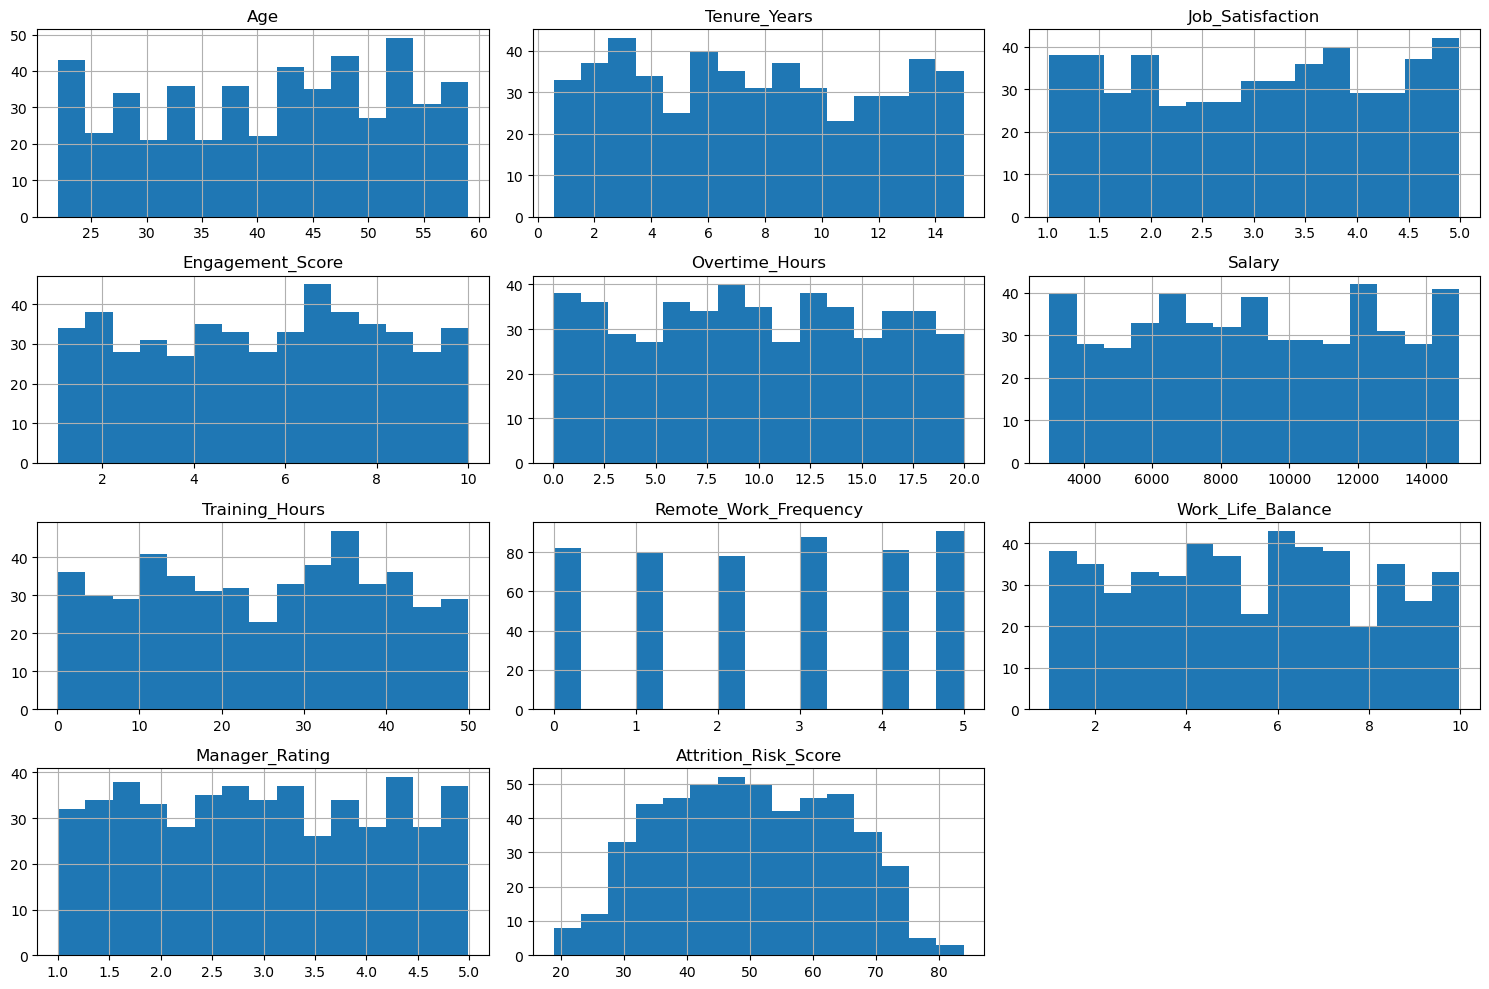

In [18]:
numeric_cols = ['Age', 'Tenure_Years', 'Job_Satisfaction', 'Engagement_Score',
                'Overtime_Hours', 'Salary', 'Training_Hours',
                'Remote_Work_Frequency', 'Work_Life_Balance', 'Manager_Rating',
                'Attrition_Risk_Score']

df[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

### 🔥 Correlation Analysis  
The heatmap below visualizes relationships between predictors and the target variable Attrition_Risk_Score.


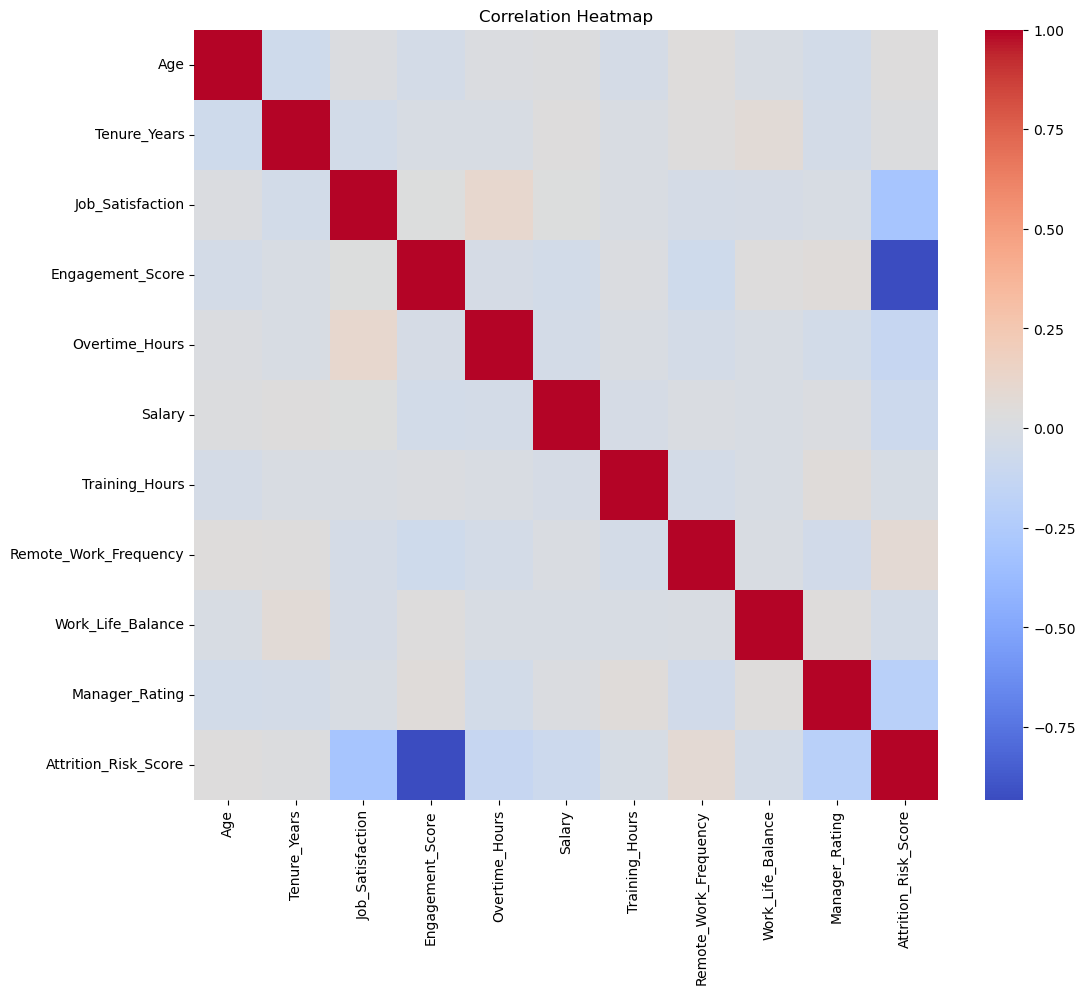

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### 🏢 Attrition Risk Score by Department  
To examine whether attrition risk differs across departments, a boxplot is used.


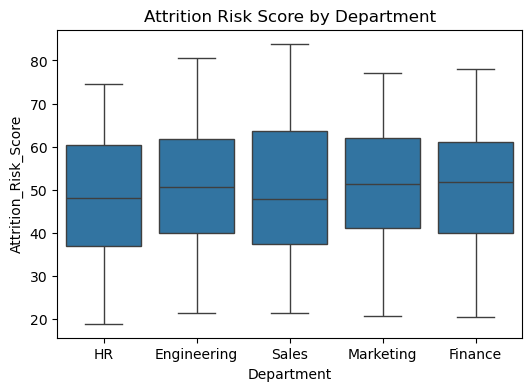

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Department", y="Attrition_Risk_Score", data=df)
plt.title("Attrition Risk Score by Department")
plt.show()

## ⚙️ 4. Data Preprocessing  
Before modelling, we prepare the dataset by encoding categorical variables, scaling features, and splitting into training/testing sets.

---


In [23]:
df_encoded = pd.get_dummies(df, columns=['Department'], drop_first=True)
df_encoded.head()


,Age,Tenure_Years,Job_Satisfaction,Engagement_Score,Overtime_Hours,Salary,Training_Hours,Remote_Work_Frequency,Work_Life_Balance,Manager_Rating,Attrition_Risk_Score,Department_Finance,Department_HR,Department_Marketing,Department_Sales
0,50,10.740512,1.471004,2.816681,9.965114,9496.891288,47.611089,2,1.605108,1.317121,71.106308,False,True,False,False
1,36,1.679557,3.306066,7.060892,1.541166,4849.740518,2.121115,5,6.353626,3.263402,44.206298,False,True,False,False
2,29,1.730147,2.096221,9.729208,1.171019,9644.537824,13.266307,1,7.649800,4.632074,31.883809,False,False,False,False
3,42,14.806274,3.216712,1.845106,6.684766,9500.457749,30.077694,3,1.291991,2.585251,68.949915,False,False,False,False
4,40,5.926927,3.605682,7.053419,15.697940,12142.821751,14.827996,4,6.928459,2.185303,39.333803,False,False,False,True


In [24]:
x = df_encoded.drop(columns=["Attrition_Risk_Score"])
y = df_encoded["Attrition_Risk_Score"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

In [26]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 🤖 5. Modelling  
We train three models:  
- Linear Regression (interpretable, baseline)  
- Random Forest (non-linear, ensemble)  
- XGBoost (boosting algorithm)

---

In [27]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
y_pred_lr = lr.predict(x_test_scaled)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print(f"MAE: ", lr_mae)
print(f"RMSE: ", lr_rmse)
print(f"R2 Score: ", lr_r2)

Linear Regression Results
MAE:  0.447573680347972
RMSE:  0.5562712877472518
R2 Score:  0.9986532462011466


In [30]:
coef_df = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
11,Department_HR,0.089034
10,Department_Finance,0.060992
1,Tenure_Years,0.053241
13,Department_Sales,0.038540
12,Department_Marketing,0.030523
6,Training_Hours,0.021374
8,Work_Life_Balance,0.006434
0,Age,-0.012637
7,Remote_Work_Frequency,-0.028945
4,Overtime_Hours,-1.698623


In [37]:
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(x_train, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
y_pred_rf = rf.predict(x_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print ("Random Forest Regression Results")
print(f"MAE: ", rf_mae)
print(f"RMSE: ", rf_rmse)
print(f"R2 Score: ", rf_r2)

Random Forest Regression Results
MAE:  2.260988127901628
RMSE:  2.7447145292933524
R2 Score:  0.9672124260225013


In [ ]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(x_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [45]:
y_pred_xgb = xgb.predict(x_test)

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

print ("XGBoost Regression Results")
print(f"MAE: ", xgb_mae)
print(f"RMSE: ", xgb_rmse)
print(f"R2 Score: ", xgb_r2)


XGBoost Regression Results
MAE:  1.3675105837671009
RMSE:  1.8135751870675394
R2 Score:  0.9856851747265644


## 📊 6. Model Evaluation & Comparison  
The table below compares model performance using MAE, RMSE, and R².  
Lower MAE/RMSE and higher R² indicate better predictive performance.


---

In [44]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [lr_mae, rf_mae, xgb_mae],
    "RMSE": [lr_rmse, rf_rmse, xgb_rmse],
    "R2": [lr_r2, rf_r2, xgb_r2]
})

results

,Model,MAE,RMSE,R2
0,Linear Regression,0.447574,0.556271,0.998653
1,Random Forest,2.260988,2.744715,0.967212
2,XGBoost,1.367511,1.169406,0.985685


## 📝 7. Interpretation & Insights  

### 🔑 Key Findings  
- **Linear Regression is the best-performing model**, achieving:  
  - MAE = 0.4476  
  - RMSE = 0.5563  
  - R² = 0.9987  
- It explains **99.87%** of the variance in Attrition_Risk_Score.  
- Engagement Score, Job Satisfaction, and Manager Rating are the strongest drivers of risk.

### 📌 Model Selection  
Linear Regression is selected as the final model for:  
- High accuracy  
- Excellent generalization  
- Strong interpretability for HR use  

---

## 🎯 8. Recommendations  
### 8.1 Strengthen Employee Engagement Programs
- Introduce engagement score tracking every quarter.
- Create recognition programs, ownership-based projects, peer mentoring.
- Use surveys + pulse checks to detect early disengagement.

### 8.2 Redesign Manager Development Programs
- Coaching workshops for leadership communication.
- Anonymous upward feedback (manager rating improvement).
- Early flagging of managers with low employee satisfaction.


### 8.3 Targeted Retention for High-Risk Profiles
- Use the predictive model to identify employees who show:
- Low engagement
- Low satisfaction 
- Low manager rating
- Consistent overtime


#### Recommended actions:
- One-on-one stay interviews
- Adjusted workloads
- Clear career pathway interventions



### 8.4 Embed the Predictive Model into HR Operations
- Automate monthly Attrition Risk scoring.
- Build dashboards visualizing risk distribution by department, role, and risk level.
- Integrate alerts for employees whose risk score increases month-over-month.


### 8.5 Improve Work-Life Balance Policies
- Review workload distribution in high-overtime teams.
- Consider flexible work models for specific roles.
- Encourage PTO utilization and reduce launch sprint burnouts.


### 8.6 Continuous Monitoring & Impact Tracking
HR should measure:
- Reduction in attrition risk scores
- Changes in engagement and satisfaction
- Actual turnover before and after interventions


